## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.383088 -0.522043  0.855187  0.351268 -1.473049 -0.565733
1  1.312311 -0.725767  0.426605 -1.046436 -1.296603 -0.944839
2  0.043446 -1.202027  1.068994 -0.010268  0.864814 -0.347413
3 -1.698115  1.275659 -0.887144 -1.174379  1.732665 -0.800583
4  1.287809 -0.939755 -0.307728  0.335873 -1.096845 -0.425325


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9812573	total: 57.4ms	remaining: 57.4s
1:	learn: 0.9713622	total: 58.1ms	remaining: 29s
2:	learn: 0.9610756	total: 58.6ms	remaining: 19.5s
3:	learn: 0.9508654	total: 59.1ms	remaining: 14.7s
4:	learn: 0.9415008	total: 59.5ms	remaining: 11.8s
5:	learn: 0.9321097	total: 60.2ms	remaining: 9.97s
6:	learn: 0.9220033	total: 60.6ms	remaining: 8.6s
7:	learn: 0.9116779	total: 61ms	remaining: 7.57s
8:	learn: 0.9019702	total: 61.6ms	remaining: 6.78s
9:	learn: 0.8936539	total: 62ms	remaining: 6.14s
10:	learn: 0.8845452	total: 62.5ms	remaining: 5.62s
11:	learn: 0.8756039	total: 63.1ms	remaining: 5.2s
12:	learn: 0.8663160	total: 63.7ms	remaining: 4.83s
13:	learn: 0.8591114	total: 64.1ms	remaining: 4.52s
14:	learn: 0.8512725	total: 64.7ms	remaining: 4.25s
15:	learn: 0.8434388	total: 65.2ms	remaining: 4.01s
16:	learn: 0.8366822	total: 65.8ms	remaining: 3.81s
17:	learn: 0.8278755	total: 66.5ms	remaining: 3.63s
18:	learn: 0.8191086	total: 66.8ms	remaining: 3.45s


101:	learn: 0.4056765	total: 108ms	remaining: 950ms
102:	learn: 0.4023192	total: 109ms	remaining: 946ms
103:	learn: 0.3995947	total: 109ms	remaining: 940ms
104:	learn: 0.3962574	total: 110ms	remaining: 934ms
105:	learn: 0.3936038	total: 110ms	remaining: 928ms
106:	learn: 0.3901288	total: 111ms	remaining: 923ms
107:	learn: 0.3873708	total: 111ms	remaining: 916ms
108:	learn: 0.3837891	total: 112ms	remaining: 912ms
109:	learn: 0.3808068	total: 112ms	remaining: 906ms
110:	learn: 0.3781162	total: 112ms	remaining: 900ms
111:	learn: 0.3754216	total: 113ms	remaining: 895ms
112:	learn: 0.3724294	total: 113ms	remaining: 889ms
113:	learn: 0.3694238	total: 114ms	remaining: 886ms
114:	learn: 0.3669128	total: 114ms	remaining: 881ms
115:	learn: 0.3640589	total: 115ms	remaining: 876ms
116:	learn: 0.3616675	total: 115ms	remaining: 870ms
117:	learn: 0.3596696	total: 116ms	remaining: 866ms
118:	learn: 0.3576175	total: 116ms	remaining: 861ms
119:	learn: 0.3549860	total: 117ms	remaining: 857ms
120:	learn: 

254:	learn: 0.1633236	total: 186ms	remaining: 545ms
255:	learn: 0.1629206	total: 187ms	remaining: 544ms
256:	learn: 0.1625301	total: 188ms	remaining: 544ms
257:	learn: 0.1613145	total: 189ms	remaining: 542ms
258:	learn: 0.1603032	total: 189ms	remaining: 541ms
259:	learn: 0.1592569	total: 190ms	remaining: 540ms
260:	learn: 0.1584130	total: 191ms	remaining: 540ms
261:	learn: 0.1581291	total: 191ms	remaining: 539ms
262:	learn: 0.1571930	total: 192ms	remaining: 538ms
263:	learn: 0.1568809	total: 192ms	remaining: 536ms
264:	learn: 0.1558826	total: 193ms	remaining: 536ms
265:	learn: 0.1555310	total: 194ms	remaining: 534ms
266:	learn: 0.1552486	total: 194ms	remaining: 532ms
267:	learn: 0.1542893	total: 194ms	remaining: 531ms
268:	learn: 0.1534226	total: 195ms	remaining: 530ms
269:	learn: 0.1523311	total: 195ms	remaining: 528ms
270:	learn: 0.1511269	total: 196ms	remaining: 527ms
271:	learn: 0.1501965	total: 196ms	remaining: 525ms
272:	learn: 0.1499007	total: 197ms	remaining: 524ms
273:	learn: 

460:	learn: 0.0588290	total: 291ms	remaining: 341ms
461:	learn: 0.0584479	total: 292ms	remaining: 340ms
462:	learn: 0.0580690	total: 292ms	remaining: 339ms
463:	learn: 0.0577302	total: 293ms	remaining: 338ms
464:	learn: 0.0574941	total: 294ms	remaining: 338ms
465:	learn: 0.0571283	total: 294ms	remaining: 337ms
466:	learn: 0.0568001	total: 295ms	remaining: 336ms
467:	learn: 0.0564560	total: 295ms	remaining: 335ms
468:	learn: 0.0562702	total: 296ms	remaining: 335ms
469:	learn: 0.0559210	total: 296ms	remaining: 334ms
470:	learn: 0.0557037	total: 296ms	remaining: 333ms
471:	learn: 0.0553636	total: 297ms	remaining: 332ms
472:	learn: 0.0550570	total: 297ms	remaining: 331ms
473:	learn: 0.0547561	total: 298ms	remaining: 330ms
474:	learn: 0.0544396	total: 298ms	remaining: 330ms
475:	learn: 0.0541160	total: 299ms	remaining: 329ms
476:	learn: 0.0537063	total: 299ms	remaining: 328ms
477:	learn: 0.0533986	total: 300ms	remaining: 327ms
478:	learn: 0.0530649	total: 300ms	remaining: 327ms
479:	learn: 

618:	learn: 0.0268183	total: 370ms	remaining: 228ms
619:	learn: 0.0266738	total: 371ms	remaining: 227ms
620:	learn: 0.0265512	total: 372ms	remaining: 227ms
621:	learn: 0.0264083	total: 372ms	remaining: 226ms
622:	learn: 0.0262840	total: 372ms	remaining: 225ms
623:	learn: 0.0261501	total: 373ms	remaining: 225ms
624:	learn: 0.0260131	total: 373ms	remaining: 224ms
625:	learn: 0.0259061	total: 374ms	remaining: 223ms
626:	learn: 0.0257730	total: 374ms	remaining: 223ms
627:	learn: 0.0256688	total: 375ms	remaining: 222ms
628:	learn: 0.0255611	total: 375ms	remaining: 221ms
629:	learn: 0.0254455	total: 376ms	remaining: 221ms
630:	learn: 0.0253497	total: 376ms	remaining: 220ms
631:	learn: 0.0252365	total: 377ms	remaining: 219ms
632:	learn: 0.0251431	total: 378ms	remaining: 219ms
633:	learn: 0.0250435	total: 378ms	remaining: 218ms
634:	learn: 0.0249578	total: 378ms	remaining: 218ms
635:	learn: 0.0248591	total: 379ms	remaining: 217ms
636:	learn: 0.0247417	total: 380ms	remaining: 216ms
637:	learn: 

829:	learn: 0.0111550	total: 475ms	remaining: 97.3ms
830:	learn: 0.0111082	total: 476ms	remaining: 96.7ms
831:	learn: 0.0110703	total: 476ms	remaining: 96.2ms
832:	learn: 0.0110330	total: 477ms	remaining: 95.5ms
833:	learn: 0.0109836	total: 477ms	remaining: 95ms
834:	learn: 0.0109362	total: 478ms	remaining: 94.4ms
835:	learn: 0.0108983	total: 478ms	remaining: 93.8ms
836:	learn: 0.0108500	total: 479ms	remaining: 93.2ms
837:	learn: 0.0108074	total: 479ms	remaining: 92.6ms
838:	learn: 0.0107704	total: 480ms	remaining: 92ms
839:	learn: 0.0107232	total: 480ms	remaining: 91.4ms
840:	learn: 0.0106836	total: 481ms	remaining: 90.8ms
841:	learn: 0.0106355	total: 481ms	remaining: 90.2ms
842:	learn: 0.0105895	total: 482ms	remaining: 89.7ms
843:	learn: 0.0105450	total: 482ms	remaining: 89.1ms
844:	learn: 0.0104985	total: 483ms	remaining: 88.5ms
845:	learn: 0.0104535	total: 483ms	remaining: 88ms
846:	learn: 0.0104138	total: 484ms	remaining: 87.4ms
847:	learn: 0.0103694	total: 484ms	remaining: 86.8ms

980:	learn: 0.0063597	total: 554ms	remaining: 10.7ms
981:	learn: 0.0063420	total: 554ms	remaining: 10.2ms
982:	learn: 0.0063133	total: 555ms	remaining: 9.59ms
983:	learn: 0.0062962	total: 555ms	remaining: 9.03ms
984:	learn: 0.0062761	total: 556ms	remaining: 8.46ms
985:	learn: 0.0062482	total: 556ms	remaining: 7.9ms
986:	learn: 0.0062317	total: 557ms	remaining: 7.33ms
987:	learn: 0.0062120	total: 558ms	remaining: 6.77ms
988:	learn: 0.0061849	total: 558ms	remaining: 6.21ms
989:	learn: 0.0061596	total: 559ms	remaining: 5.64ms
990:	learn: 0.0061458	total: 559ms	remaining: 5.08ms
991:	learn: 0.0061196	total: 560ms	remaining: 4.51ms
992:	learn: 0.0061062	total: 560ms	remaining: 3.95ms
993:	learn: 0.0060788	total: 561ms	remaining: 3.38ms
994:	learn: 0.0060533	total: 561ms	remaining: 2.82ms
995:	learn: 0.0060403	total: 561ms	remaining: 2.25ms
996:	learn: 0.0060155	total: 562ms	remaining: 1.69ms
997:	learn: 0.0060065	total: 562ms	remaining: 1.13ms
998:	learn: 0.0059956	total: 563ms	remaining: 5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

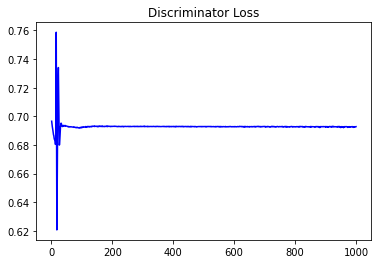

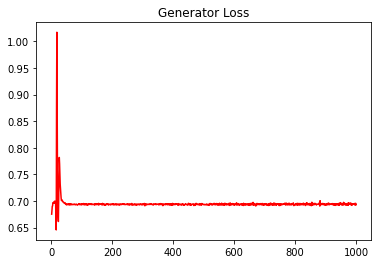

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.05645844054773276


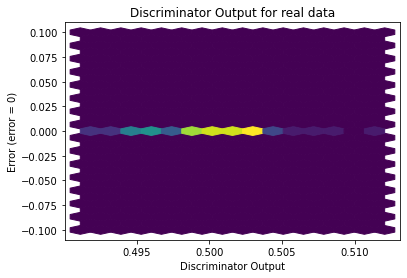

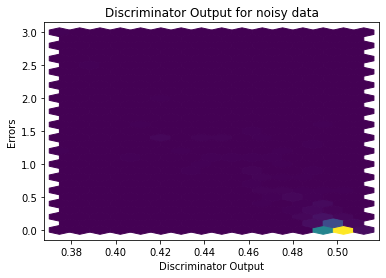

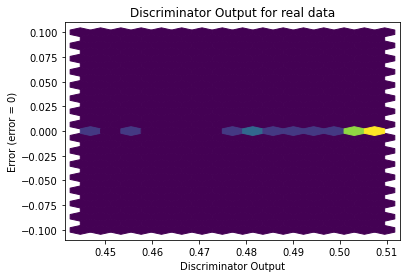

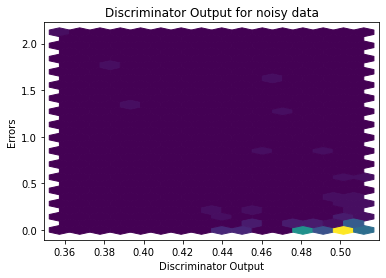

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


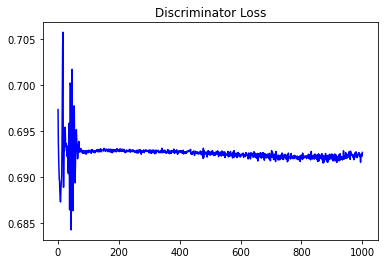

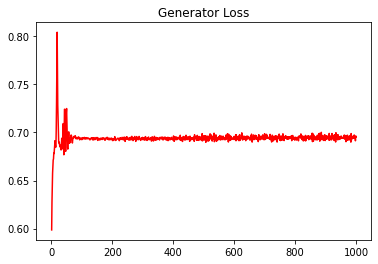

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.04400679496233348


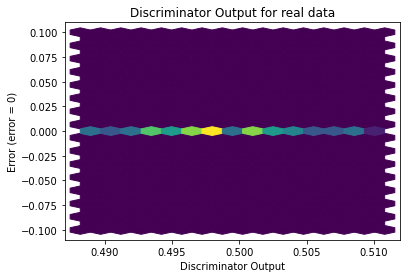

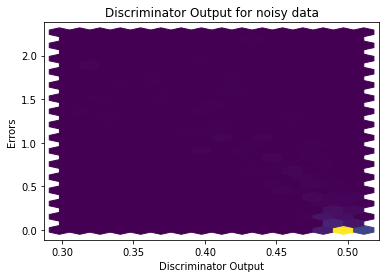

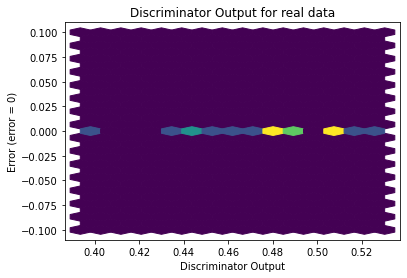

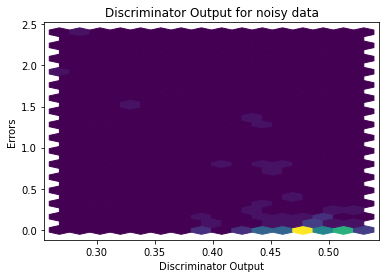

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4195]], requires_grad=True)
